# Task-1   Airline Review Analysis

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
data = pd.DataFrame(reviews,columns=["Reviews"] )
data.head()

,Reviews
0,✅ Trip Verified | My family and I have flown ...
1,✅ Trip Verified | This has been by far the wo...
2,✅ Trip Verified | In Nov 2022 I booked and pa...
3,Not Verified | BA is not treating its premium ...
4,✅ Trip Verified | 24 hours before our departu...


## Step 1: Cleaning the text

In [4]:
# Splitting the reviews based on | symbol
data["Reviews"]= data["Reviews"].str.split('|',expand=True)[1]
data.head()

,Reviews
0,My family and I have flown mostly on British...
1,This has been by far the worst service I hav...
2,In Nov 2022 I booked and paid for a return j...
3,BA is not treating its premium economy passen...
4,24 hours before our departure on BA059 to Ca...


In [5]:
# Removes all special characters and numericals leaving the alphabets
import re

def clean(text):

    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

data["Cleaned Reviews"] = data["Reviews"].apply(clean)
data.head()

,Reviews,Cleaned Reviews
0,My family and I have flown mostly on British...,My family and I have flown mostly on British ...
1,This has been by far the worst service I hav...,This has been by far the worst service I have...
2,In Nov 2022 I booked and paid for a return j...,In Nov I booked and paid for a return journey...
3,BA is not treating its premium economy passen...,BA is not treating its premium economy passen...
4,24 hours before our departure on BA059 to Ca...,hours before our departure on BA to Cape Town...


## Step 2: Tokenization

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

## Step 3: Enrichment – POS tagging

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

## Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing.


In [6]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

data['POS tagged'] = data['Cleaned Reviews'].apply(token_stop_pos)
data.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Reviews,Cleaned Reviews,POS tagged
0,My family and I have flown mostly on British...,My family and I have flown mostly on British ...,"[(family, n), (flown, v), (mostly, r), (Britis..."
1,This has been by far the worst service I hav...,This has been by far the worst service I have...,"[(far, r), (worst, a), (service, n), (plane, n..."
2,In Nov 2022 I booked and paid for a return j...,In Nov I booked and paid for a return journey...,"[(Nov, n), (booked, v), (paid, v), (return, n)..."
3,BA is not treating its premium economy passen...,BA is not treating its premium economy passen...,"[(BA, n), (treating, v), (premium, a), (econom..."
4,24 hours before our departure on BA059 to Ca...,hours before our departure on BA to Cape Town...,"[(hours, n), (departure, n), (BA, n), (Cape, v..."


# Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

In [8]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

data['Lemma'] = data['POS tagged'].apply(lemmatize)
data.head()

,Reviews,Cleaned Reviews,POS tagged,Lemma
0,My family and I have flown mostly on British...,My family and I have flown mostly on British ...,"[(family, n), (flown, v), (mostly, r), (Britis...",family fly mostly British Airways last year ...
1,This has been by far the worst service I hav...,This has been by far the worst service I have...,"[(far, r), (worst, a), (service, n), (plane, n...",far bad service plane obvious fly economy fr...
2,In Nov 2022 I booked and paid for a return j...,In Nov I booked and paid for a return journey...,"[(Nov, n), (booked, v), (paid, v), (return, n)...",Nov book pay return journey New Zealand retu...
3,BA is not treating its premium economy passen...,BA is not treating its premium economy passen...,"[(BA, n), (treating, v), (premium, a), (econom...",BA treat premium economy passenger respect p...
4,24 hours before our departure on BA059 to Ca...,hours before our departure on BA to Cape Town...,"[(hours, n), (departure, n), (BA, n), (Cape, v...",hour departure BA Cape Town Heathrow Thursda...


In [9]:
data[['Reviews','Lemma']]

,Reviews,Lemma
0,My family and I have flown mostly on British...,family fly mostly British Airways last year ...
1,This has been by far the worst service I hav...,far bad service plane obvious fly economy fr...
2,In Nov 2022 I booked and paid for a return j...,Nov book pay return journey New Zealand retu...
3,BA is not treating its premium economy passen...,BA treat premium economy passenger respect p...
4,24 hours before our departure on BA059 to Ca...,hour departure BA Cape Town Heathrow Thursda...
...,...,...
995,Glasgow to Miami via London. Glasgow to Heat...,Glasgow Miami via London Glasgow Heathrow pa...
996,London Heathrow to Budapest. After so much d...,London Heathrow Budapest much disappointing ...
997,Budapest to London Heathrow. The flight depa...,Budapest London Heathrow flight depart time ...
998,London to Toronto. Group of 10 people age fr...,London Toronto Group people age Business Cla...


# Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.



In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

data['Sentiment'] = data['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
data['Analysis'] = data['Sentiment'].apply(vader_analysis)

In [11]:
data.head()

,Reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,My family and I have flown mostly on British...,My family and I have flown mostly on British ...,"[(family, n), (flown, v), (mostly, r), (Britis...",family fly mostly British Airways last year ...,0.9422,Positive
1,This has been by far the worst service I hav...,This has been by far the worst service I have...,"[(far, r), (worst, a), (service, n), (plane, n...",far bad service plane obvious fly economy fr...,0.2500,Neutral
2,In Nov 2022 I booked and paid for a return j...,In Nov I booked and paid for a return journey...,"[(Nov, n), (booked, v), (paid, v), (return, n)...",Nov book pay return journey New Zealand retu...,-0.5801,Negative
3,BA is not treating its premium economy passen...,BA is not treating its premium economy passen...,"[(BA, n), (treating, v), (premium, a), (econom...",BA treat premium economy passenger respect p...,0.6597,Positive
4,24 hours before our departure on BA059 to Ca...,hours before our departure on BA to Cape Town...,"[(hours, n), (departure, n), (BA, n), (Cape, v...",hour departure BA Cape Town Heathrow Thursda...,-0.7713,Negative


In [12]:
vader_counts = data['Analysis'].value_counts()
vader_counts

Positive    499
Negative    391
Neutral     110
Name: Analysis, dtype: int64

# Visual Representation

<function matplotlib.pyplot.show(close=None, block=None)>

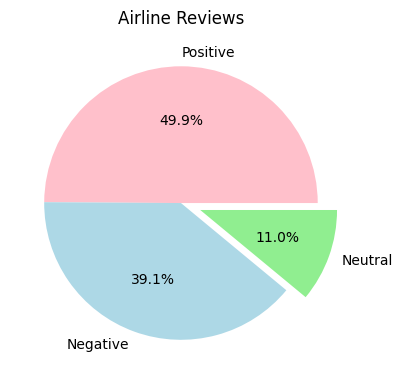

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Airline Reviews")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.15), autopct='%1.1f%%',colors=["pink","lightblue","lightgreen"])
plt.show

# Wordcloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

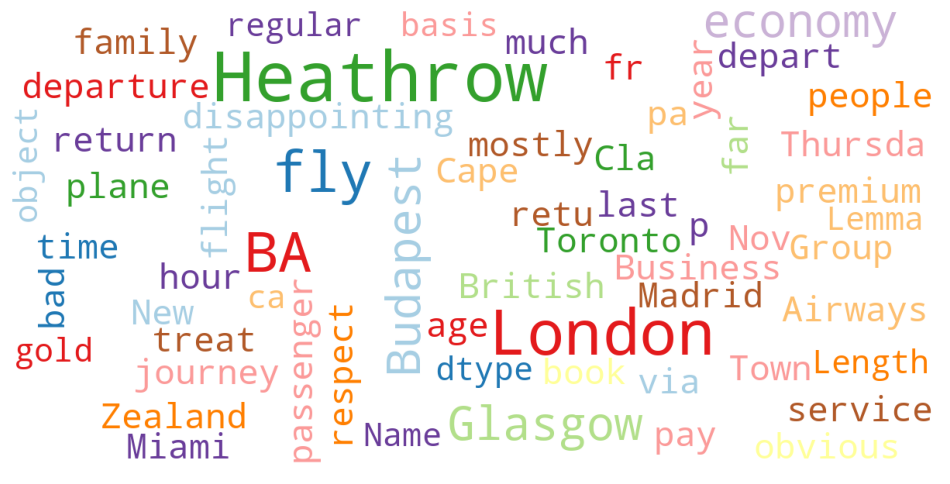

In [18]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        colormap='Paired',
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data["Lemma"])

# wordcloud = WordCloud(width=1600, height=800,
#                       colormap='Paired').generate(result)
# plt.figure(figsize=(12, 14), facecolor='k')